In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
log_welch = np.load('../Results/log_welch.npy')
# cc,density,speed,cues_sec, freq

In [5]:
saveall = []

for ii in range(len(log_welch)):
    for tt in range(len(log_welch[ii])):        
        saveall.append( log_welch[ii][tt] )

In [6]:
saveall = np.array(saveall)

In [7]:
data_dict = {}

data_dict['cc'] = saveall[:,0].tolist()
data_dict['density'] = saveall[:,1].tolist()
data_dict['speed'] = saveall[:,2].tolist()
data_dict['cues'] = saveall[:,3].tolist()
data_dict['freq'] = saveall[:,4].tolist()

In [21]:
import codecs, json 

file_path = "/Users/diogo/Desktop/test_tensorflowJs/normaliserdata.json" ## your path variable
json.dump(data_dict, codecs.open(file_path, 'w') )

# Keras regression

In [53]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler

In [100]:
x = data_dict['cues']
y = data_dict['freq']


x = np.array(x)
y = np.array(y)

# sc = StandardScaler()
# x = sc.fit_transform(x)
# y = sc.fit_transform(y)

In [77]:
def build_run_regression_model(activation_func):

    inputs = Input(shape=(1,))
    preds = Dense(1,activation=activation_func)(inputs)

    model = Model(inputs=inputs,outputs=preds)
    sgd=keras.optimizers.SGD()
    model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
    model.fit(x,y, batch_size=1, epochs=10, shuffle=False, verbose=False)
    
    return model



def plot_regresion(model, activation_function):

    ff = []
    for ii in np.linspace( min(x), max(x), 100):
        ff.append( model.predict( np.array([ ii ]) )[0][0] )

    plt.plot(  np.linspace(min(x),max(x),100), ff, '.' )

    plt.title(activation_function)
    plt.show()

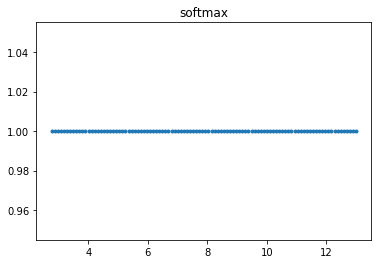

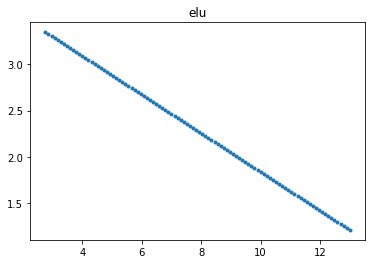

selu


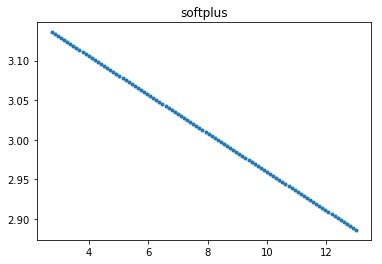

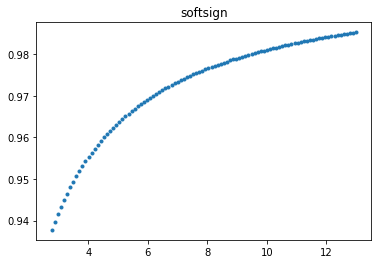

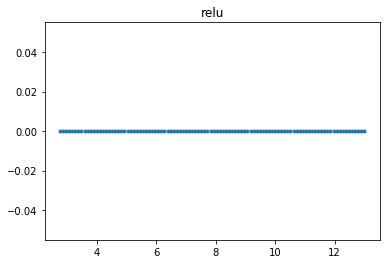

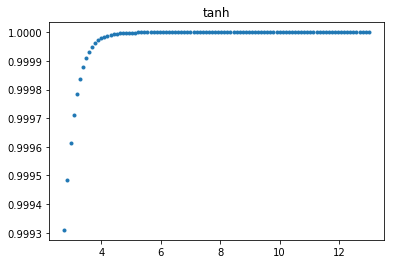

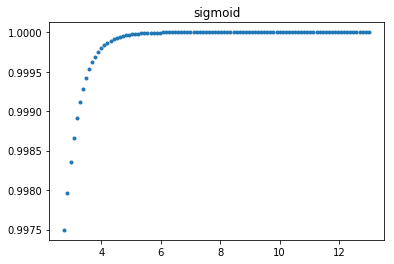

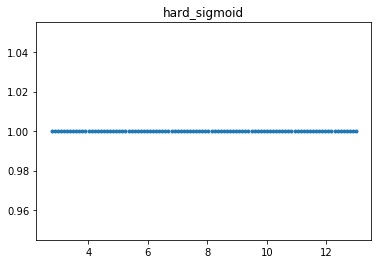

exponential


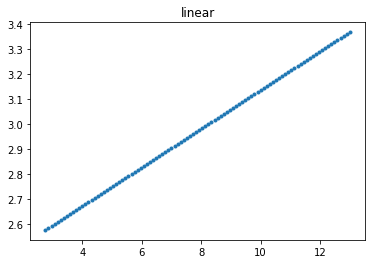

In [79]:
act_type = ['softmax','elu','selu','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','exponential','linear']

for act in act_type:
    try:
        this_model = build_run_regression_model(act)
        plot_regresion(this_model,act)
        
    except: print act


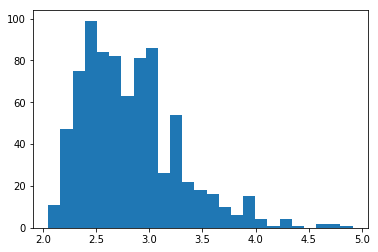

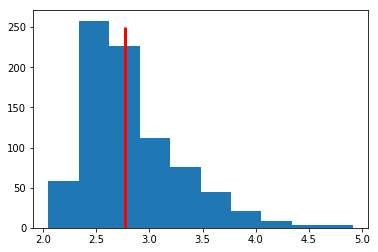

In [90]:
plt.hist(y, bins=25);
plt.show()

plt.hist(y);
mm = np.median(y)

plt.vlines(mm,0,250,'r', linewidth=3)


(1, 15)

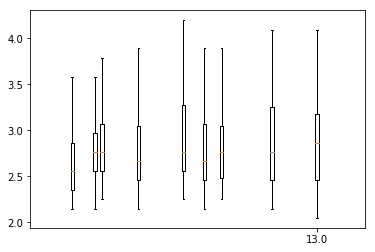

In [135]:
for ii in np.unique(x):
    idx = np.where(x==ii)[0]
    plt.boxplot( y[idx], positions=[ii], sym='' )
    
plt.xlim(1,15)
# plt.ylim(2.2,3.15)